# Exploratory Data Analysis (EDA)

Welcome to the EDA notebook for the Insurance4Africa project. This notebook will guide us through understanding our cleaned data, focusing on customer demographics, policy attributes, and fraud detection.

## 1. Setup and Data Loading

First, we import necessary libraries and load the cleaned data into a DataFrame.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
file_path = 'insurance_claims_cleaned.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,2,1.0,71610.0,6510.0,13020.0,52080,Saab,92x,2004,1
1,228,42,342868,2006-06-27,IN,250/500,2000.0,1197.22,0,468176,...,0,NaN,5070.0,780.0,780.0,3510,Mercedes,E400,2007,1
2,134,29,687698,2000-09-06,OH,100/300,2000.0,1413.14,0,430632,...,3,0.0,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,0
3,256,41,227811,1990-05-25,IL,250/500,2000.0,1415.74,0,608117,...,2,0.0,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,2014-06-06,IL,500/1000,1000.0,1583.91,0,610706,...,1,0.0,6500.0,1300.0,650.0,4550,Accura,RSX,2009,0


## 2. Data Overview

Understand the structure of the data by looking at its shape, columns, and basic statistics.

In [9]:
# Data structure overview
print(f'Data Shape: {df.shape}')
print('\nColumns:', df.columns)

# Basic statistics
df.describe(include='all').T

Data Shape: (1000, 39)

Columns: Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,NaN,NaN,NaN,203.954,115.113174,0.0,115.75,199.5,276.25,479.0
age,1000.0,NaN,NaN,NaN,38.955,9.110652,19.0,32.0,38.0,44.0,62.0
policy_number,1000.0,NaN,NaN,NaN,546238.648,257063.005276,100804.0,335980.25,533135.0,759099.75,999435.0
policy_bind_date,1000,951,2006-01-01,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_state,1000,3,OH,352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_csl,1000,3,250/500,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_deductable,1000.0,NaN,NaN,NaN,1134.0,610.669237,500.0,500.0,1000.0,2000.0,2000.0
policy_annual_premium,1000.0,NaN,NaN,NaN,1257.105976,241.929265,602.87625,1090.5675,1257.83,1415.695,1903.38625
umbrella_limit,1000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
insured_zip,1000.0,NaN,NaN,NaN,501214.488,71701.610941,430104.0,448404.5,466445.5,603251.0,620962.0


## 3. Customer Demographics

Analyze demographic information such as age, sex, and education level of the insured.

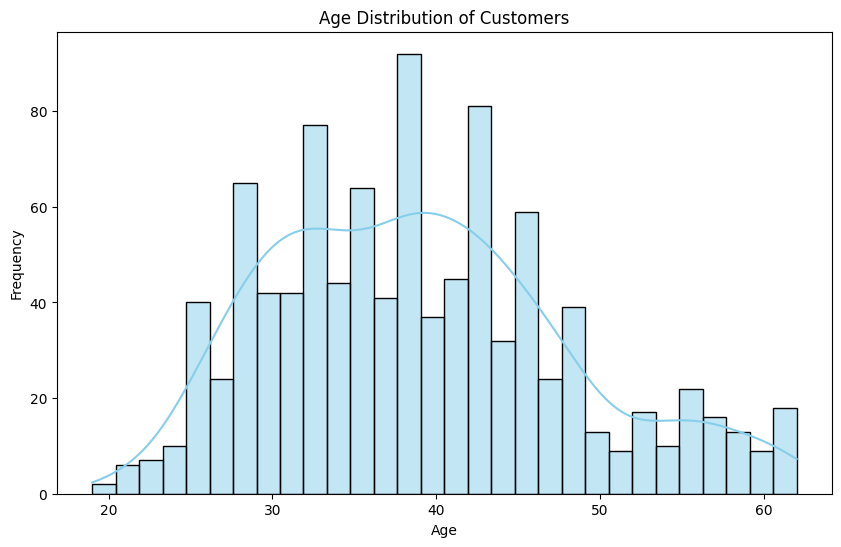

/var/folders/p4/2ljvyy2n2ms1bzxfp6z4j1r40000gp/T/ipykernel_63943/3161161675.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='insured_sex', palette='viridis')


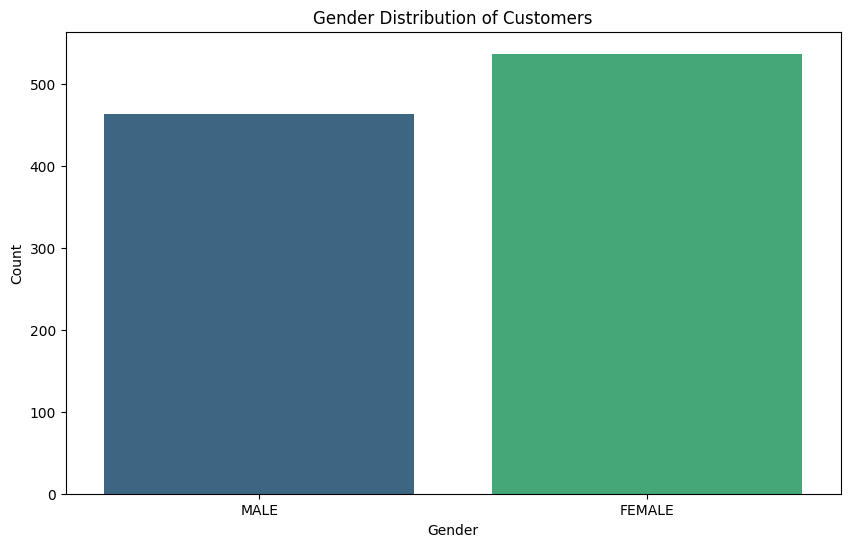

/var/folders/p4/2ljvyy2n2ms1bzxfp6z4j1r40000gp/T/ipykernel_63943/3161161675.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='insured_education_level', palette='coolwarm')


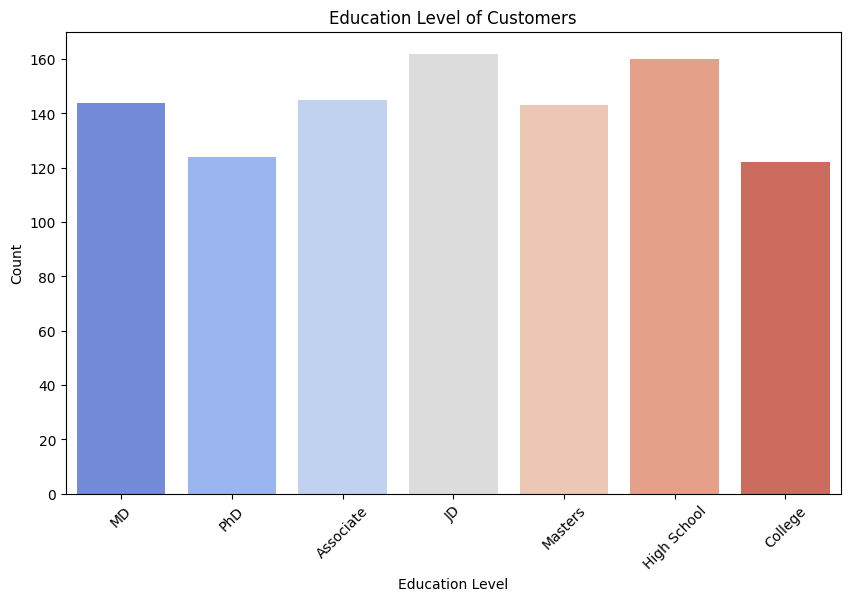

In [10]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='insured_sex', palette='viridis')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Education level distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='insured_education_level', palette='coolwarm')
plt.title('Education Level of Customers')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## 4. Policy Attributes

Examine key policy attributes like annual premium, deductibles, and umbrella limits.

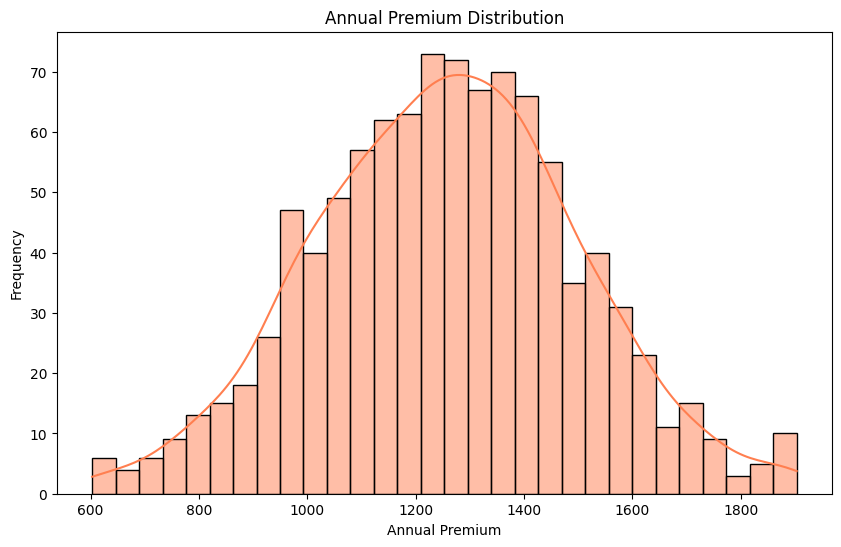

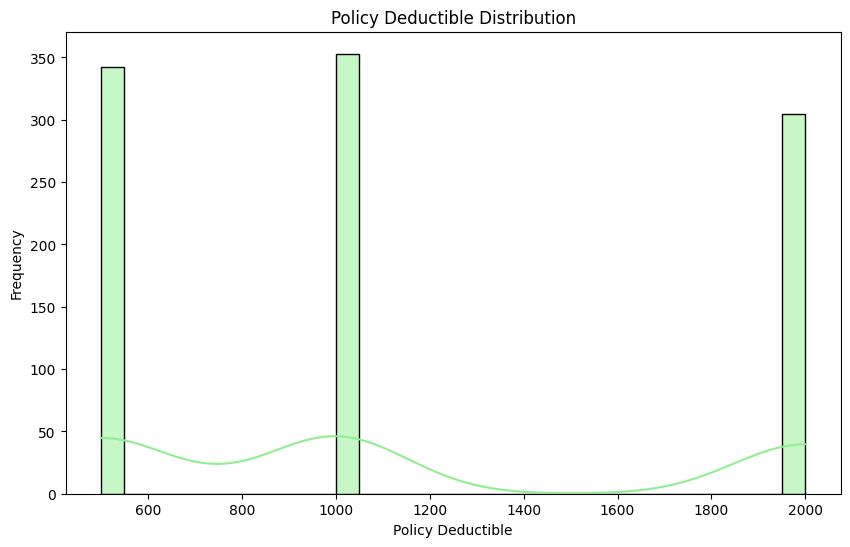

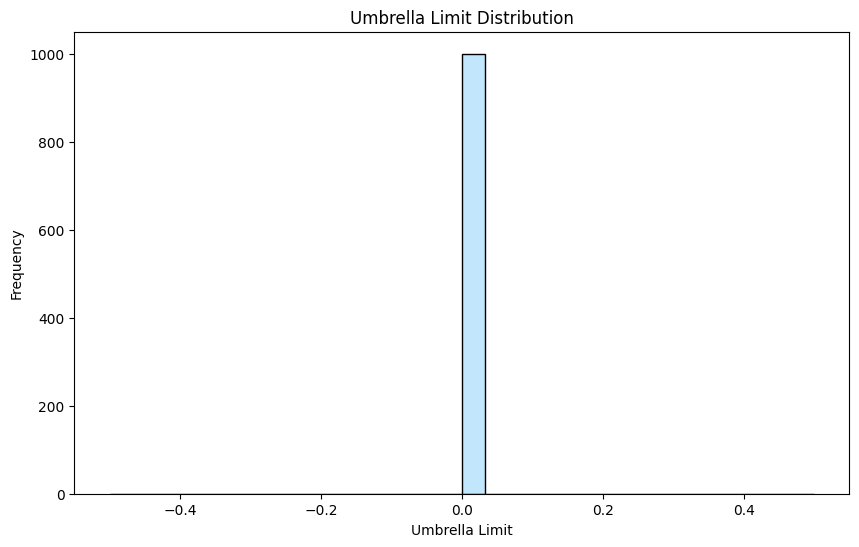

In [11]:
# Annual premium distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['policy_annual_premium'], bins=30, kde=True, color='coral')
plt.title('Annual Premium Distribution')
plt.xlabel('Annual Premium')
plt.ylabel('Frequency')
plt.show()

# Deductible distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['policy_deductable'], bins=30, kde=True, color='lightgreen')
plt.title('Policy Deductible Distribution')
plt.xlabel('Policy Deductible')
plt.ylabel('Frequency')
plt.show()

# Umbrella limit distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['umbrella_limit'], bins=30, kde=True, color='lightskyblue')
plt.title('Umbrella Limit Distribution')
plt.xlabel('Umbrella Limit')
plt.ylabel('Frequency')
plt.show()

## 5. Fraud Detection Patterns

Investigate patterns and trends related to reported fraud cases.

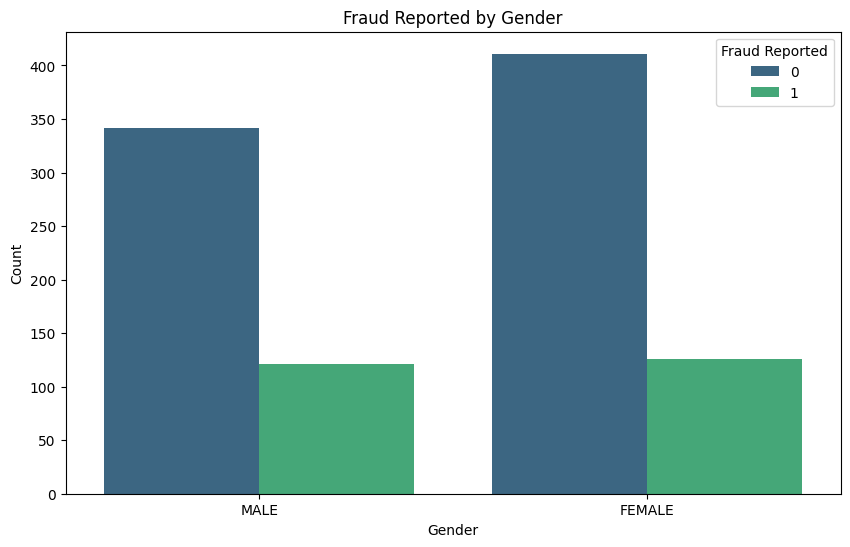

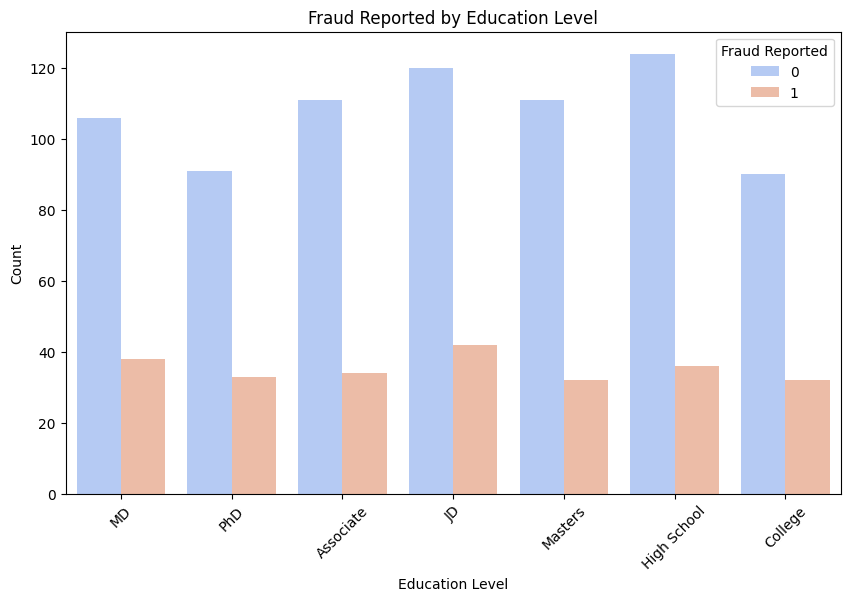

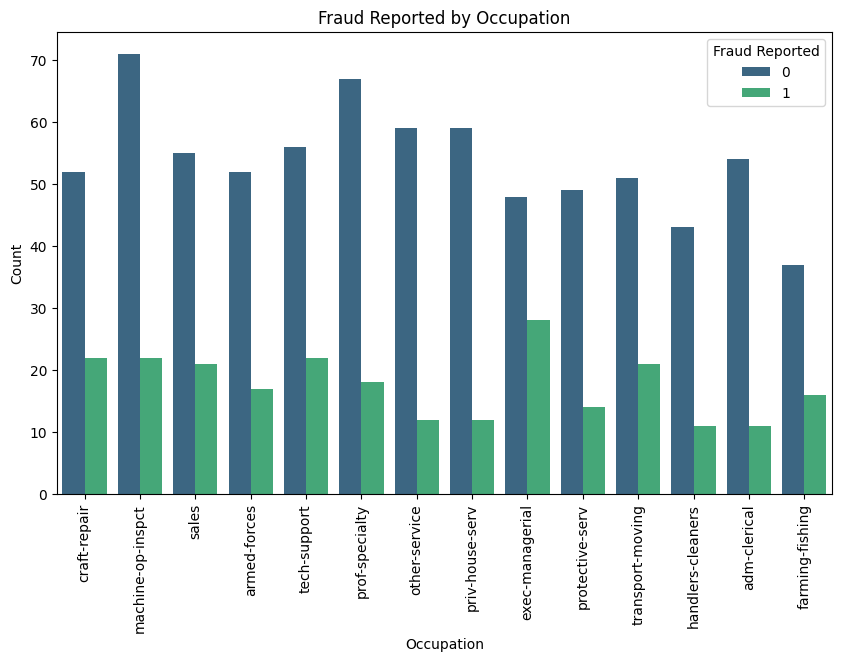

In [12]:
# Fraud reported by gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='insured_sex', hue='fraud_reported', palette='viridis')
plt.title('Fraud Reported by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Fraud Reported')
plt.show()

# Fraud reported by education level
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='insured_education_level', hue='fraud_reported', palette='coolwarm')
plt.title('Fraud Reported by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fraud Reported')
plt.show()

# Fraud reported by occupation
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='insured_occupation', hue='fraud_reported', palette='viridis')
plt.title('Fraud Reported by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Fraud Reported')
plt.show()

## 6. Policy Analysis

Explore relationships between policy attributes and fraud detection.

/var/folders/p4/2ljvyy2n2ms1bzxfp6z4j1r40000gp/T/ipykernel_63943/2268858692.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fraud_reported', y='policy_annual_premium', palette='muted')


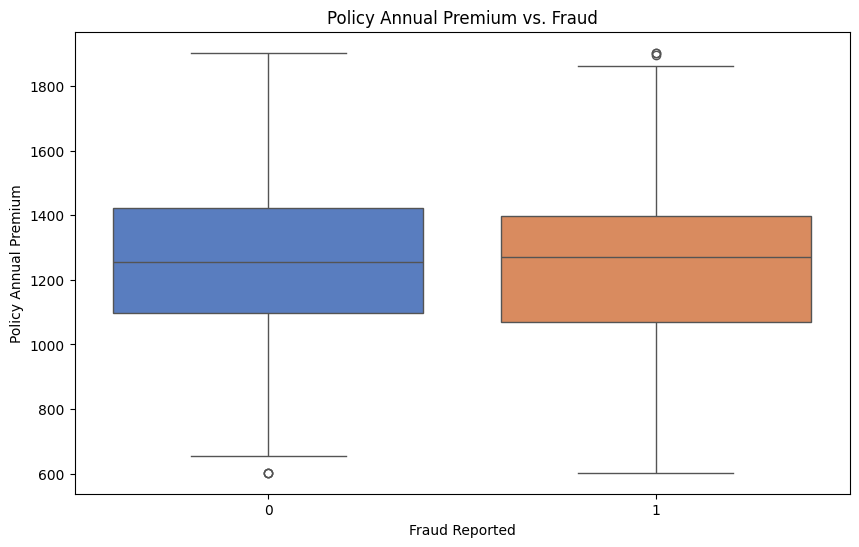

/var/folders/p4/2ljvyy2n2ms1bzxfp6z4j1r40000gp/T/ipykernel_63943/2268858692.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fraud_reported', y='policy_deductable', palette='muted')


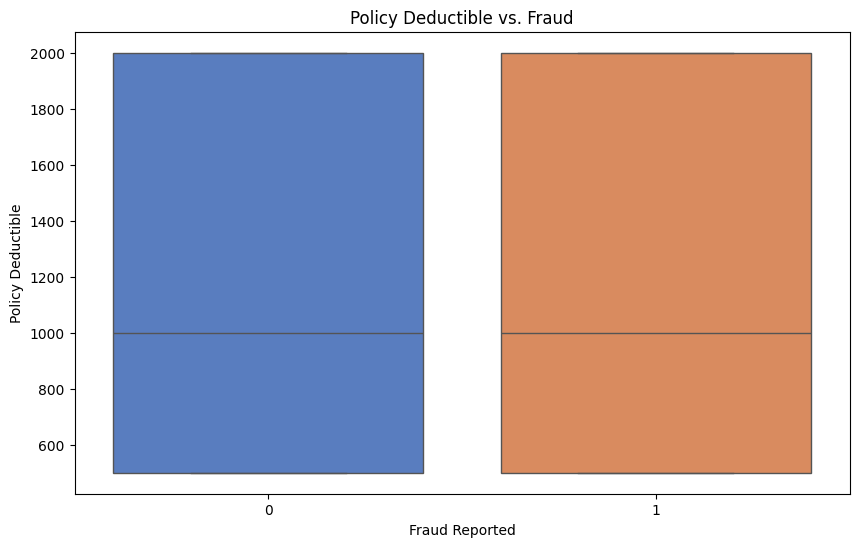

In [13]:
# Policy annual premium vs. fraud
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='fraud_reported', y='policy_annual_premium', palette='muted')
plt.title('Policy Annual Premium vs. Fraud')
plt.xlabel('Fraud Reported')
plt.ylabel('Policy Annual Premium')
plt.show()

# Policy deductible vs. fraud
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='fraud_reported', y='policy_deductable', palette='muted')
plt.title('Policy Deductible vs. Fraud')
plt.xlabel('Fraud Reported')
plt.ylabel('Policy Deductible')
plt.show()

## 7. Summary and Insights

Summarize key insights derived from the EDA.

In [14]:
# Summary of key insights
print("\nKey Insights:")
print("1. Age Distribution: Most customers are in the range of 30-45 years.")
print("2. Gender Distribution: There is a balanced representation of genders among customers.")
print("3. Education Level: Most customers have a higher education degree.")
print("4. Annual Premium: Premiums are widely distributed, with a concentration in the lower range.")
print("5. Fraud Patterns: Fraud is more reported among certain occupations and education levels.")


Key Insights:
1. Age Distribution: Most customers are in the range of 30-45 years.
2. Gender Distribution: There is a balanced representation of genders among customers.
3. Education Level: Most customers have a higher education degree.
4. Annual Premium: Premiums are widely distributed, with a concentration in the lower range.
5. Fraud Patterns: Fraud is more reported among certain occupations and education levels.


## Conclusion

This EDA notebook has provided valuable insights into the customer demographics, policy attributes, and fraud detection patterns in the insurance data. These findings will help shape our strategies for targeting customers and managing risks effectively.